In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [350]:
def model(x, y, theta, learning_rate, iterations):
    cost_list = []
    for _ in range(iterations):
        pred=(x@theta)
        pred=1/(1 + np.exp(-pred))
        error=pred-y
        #print(error.values)
        grads=(1/x.shape[0])*(x.T@error)
        theta = np.subtract(theta,learning_rate * grads)
    return theta

def compute_cost(X, y, theta):
    x_dot_theta = X.dot(theta)
    J = 1.0 / len(X) * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))
    return J

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def compute_cost(X, y, theta):
    x_dot_theta = X.dot(theta)
    J = 1.0 / m * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))

    return J


In [351]:
                                    #Data preprocessing stage

In [352]:
main_df = pd.read_csv("census_income.csv")
main_df
num_col = main_df.select_dtypes(exclude=["object_"])
cat_col = main_df.select_dtypes(exclude=["number"])

In [353]:
print(num_col.shape)
print(cat_col.shape)

(17841, 5)
(17841, 9)


In [354]:
print(main_df.shape)
print(main_df.dtypes)

(17841, 14)
age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [355]:
main_df.isnull().sum()  #we have no null values 

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [356]:
print("Categorial Data : ", cat_col.columns)
print("Numeric Data : ", num_col.columns)

Categorial Data :  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')
Numeric Data :  Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [357]:
main_df.nunique()

age                70
workclass           9
education          16
education-num      16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      105
capital-loss       82
hours-per-week     91
native-country     40
income              2
dtype: int64

In [358]:
main_df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,17841.000000,17841.000000,17841.000000,17841.000000,17841.000000
mean,40.016759,10.484054,1841.885825,116.625357,41.802926
std,13.033215,2.599928,9867.217768,465.333031,12.184754
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,30.000000,9.000000,0.000000,0.000000,40.000000
50%,39.000000,10.000000,0.000000,0.000000,40.000000
75%,49.000000,13.000000,0.000000,0.000000,48.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [359]:
main_df['workclass'].value_counts()   #we have ? as data

Private             12161
Self-emp-not-inc     1455
Local-gov            1243
?                     820
Self-emp-inc          817
State-gov             741
Federal-gov           597
Without-pay             4
Never-worked            3
Name: workclass, dtype: int64

In [360]:
main_df['occupation'].value_counts()  

Exec-managerial      2834
Prof-specialty       2750
Craft-repair         2222
Sales                2069
Adm-clerical         1795
Other-service        1480
Machine-op-inspct     950
Transport-moving      865
?                     823
Handlers-cleaners     604
Tech-support          534
Farming-fishing       453
Protective-serv       395
Priv-house-serv        65
Armed-Forces            2
Name: occupation, dtype: int64

In [361]:
main_df['native-country'].value_counts()  

United-States         16085
?                       318
Mexico                  260
Philippines             115
Germany                  89
Canada                   66
India                    59
Puerto-Rico              56
Cuba                     53
England                  51
Italy                    46
China                    46
El-Salvador              46
South                    39
Jamaica                  38
Japan                    38
Poland                   37
Vietnam                  37
Dominican-Republic       36
Columbia                 31
Guatemala                29
Taiwan                   29
Iran                     27
Haiti                    27
France                   22
Portugal                 15
Ecuador                  14
Peru                     14
Greece                   13
Cambodia                 13
Hong                     12
Nicaragua                12
Ireland                  11
Yugoslavia               11
Trinadad&Tobago          10
Hungary             

In [362]:
                                #Filling missing data

In [363]:
main_df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [364]:
main_df['workclass'] = main_df['workclass'].replace('?', 'Private') #replacing with mode
main_df['occupation'] = main_df['occupation'].replace('?', 'Exec-managerial')
main_df['native-country'] = main_df['native-country'].replace('?', 'United-States')

In [365]:
main_df["native-country"].value_counts()

United-States         16403
Mexico                  260
Philippines             115
Germany                  89
Canada                   66
India                    59
Puerto-Rico              56
Cuba                     53
England                  51
El-Salvador              46
Italy                    46
China                    46
South                    39
Jamaica                  38
Japan                    38
Vietnam                  37
Poland                   37
Dominican-Republic       36
Columbia                 31
Taiwan                   29
Guatemala                29
Haiti                    27
Iran                     27
France                   22
Portugal                 15
Ecuador                  14
Peru                     14
Greece                   13
Cambodia                 13
Hong                     12
Nicaragua                12
Ireland                  11
Yugoslavia               11
Trinadad&Tobago          10
Hungary                   9
Laos                

In [366]:
main_df.head(8)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
1,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
2,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
3,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
4,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
5,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
6,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
7,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [367]:
                                        #handle categroical data

In [368]:
#since there are many categorical features try to reduce the number of categorical features

In [369]:
#education can be replaced made into 3 categories as school, high school, higher, undergrad, grad, doc

In [370]:
main_df.education= main_df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
main_df.education = main_df.education.replace('HS-grad', 'high school')
main_df.education = main_df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
main_df.education = main_df.education.replace('Bachelors', 'undergrad')
main_df.education = main_df.education.replace('Masters', 'grad')
main_df.education = main_df.education.replace('Doctorate', 'doc')

In [371]:
#martial status
main_df['marital-status']= main_df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
main_df['marital-status']= main_df['marital-status'].replace(['Never-married'], 'not-married')
main_df['marital-status']= main_df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [372]:
# income  ##here categorical feature is converted to numerical data
main_df.income = main_df.income.replace('<=50K', 0)
main_df.income = main_df.income.replace('>50K', 1)

In [373]:
main_df['income'].unique 

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
17836    0
17837    0
17838    0
17839    0
17840    0
Name: income, Length: 17841, dtype: int64>

In [374]:
                                                #check corr

In [375]:
main_df.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.075006,0.088224,0.063668,0.078374,0.287609
education-num,0.075006,1.000000,0.138364,0.095234,0.178297,0.384054
capital-gain,0.088224,0.138364,1.000000,-0.046787,0.088020,0.194228
capital-loss,0.063668,0.095234,-0.046787,1.000000,0.070141,0.149148
hours-per-week,0.078374,0.178297,0.088020,0.070141,1.000000,0.266722
income,0.287609,0.384054,0.194228,0.149148,0.266722,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

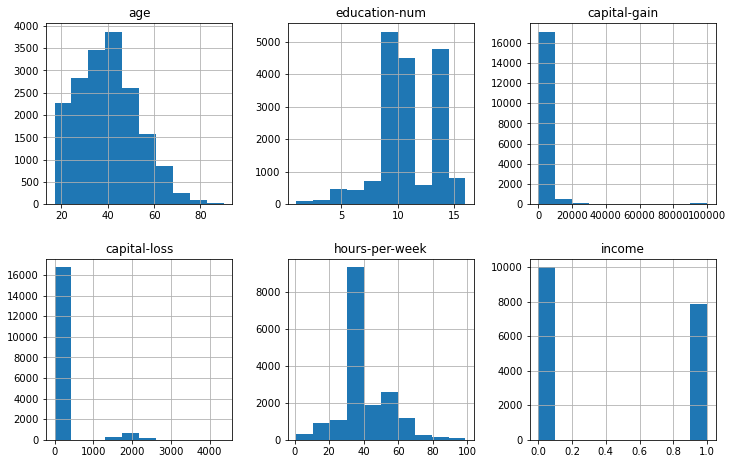

In [376]:
main_df.hist(figsize = (12, 12), layout = (3, 3), sharex = False)

In [377]:
                                                #check outliers

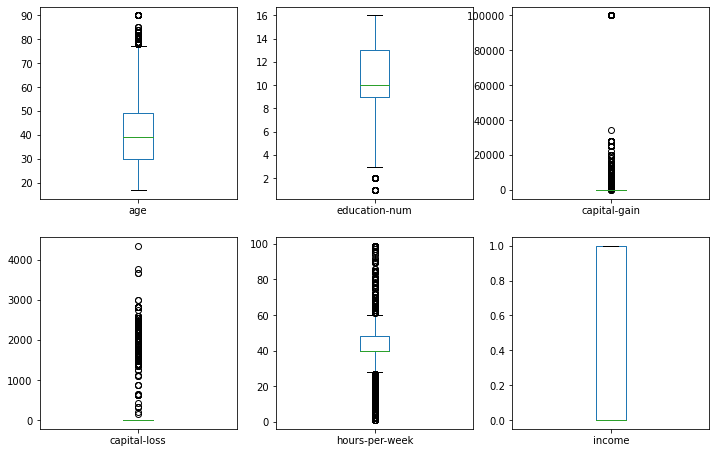

In [378]:
main_df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

In [379]:
#we can seperate input and output variables
X = main_df.drop(['income'], axis = 1)
y = main_df['income']

In [380]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,52,Self-emp-not-inc,high school,9,married,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,31,Private,grad,14,not-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
2,42,Private,undergrad,13,married,Exec-managerial,Husband,White,Male,5178,0,40,United-States
3,37,Private,higher,10,married,Exec-managerial,Husband,Black,Male,0,0,80,United-States
4,30,State-gov,undergrad,13,married,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17836,18,Private,school,7,not-married,Exec-managerial,Own-child,Black,Male,0,1602,48,United-States
17837,20,Private,high school,9,not-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States
17838,24,Private,high school,9,not-married,Other-service,Other-relative,White,Male,0,0,25,United-States
17839,75,Private,school,1,not-married,Priv-house-serv,Not-in-family,Asian-Pac-Islander,Female,0,0,48,Philippines


In [381]:
y

0        1
1        1
2        1
3        1
4        1
        ..
17836    0
17837    0
17838    0
17839    0
17840    0
Name: income, Length: 17841, dtype: int64

In [382]:
                                        #univariate

In [383]:
uni_df = main_df
print(uni_df)

       age         workclass    education  education-num marital-status  \
0       52  Self-emp-not-inc  high school              9        married   
1       31           Private         grad             14    not-married   
2       42           Private    undergrad             13        married   
3       37           Private       higher             10        married   
4       30         State-gov    undergrad             13        married   
...    ...               ...          ...            ...            ...   
17836   18           Private       school              7    not-married   
17837   20           Private  high school              9    not-married   
17838   24           Private  high school              9    not-married   
17839   75           Private       school              1    not-married   
17840   21           Private       higher             11    not-married   

              occupation    relationship                race     sex  \
0        Exec-managerial   

In [384]:
main_df.corr()  ##we will take education-num as our only feature to predict income

,age,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.075006,0.088224,0.063668,0.078374,0.287609
education-num,0.075006,1.000000,0.138364,0.095234,0.178297,0.384054
capital-gain,0.088224,0.138364,1.000000,-0.046787,0.088020,0.194228
capital-loss,0.063668,0.095234,-0.046787,1.000000,0.070141,0.149148
hours-per-week,0.078374,0.178297,0.088020,0.070141,1.000000,0.266722
income,0.287609,0.384054,0.194228,0.149148,0.266722,1.000000


In [385]:
X_u = uni_df['age'].values
y_u = uni_df['income'].values

In [386]:
print(X_u.shape)
print(y_u.shape)

(17841,)
(17841,)


Text(0.5, 1.0, 'Scatter plot of data')

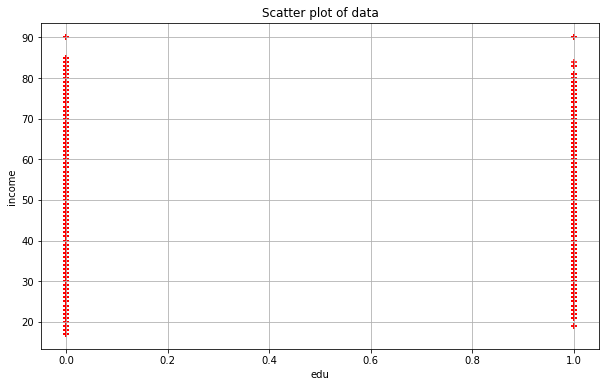

In [387]:
plt.scatter(y_u,X_u, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('edu')
plt.ylabel('income')
plt.title('Scatter plot of data')

In [388]:
uni_df = uni_df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(uni_df))
# Split your dataset 
X_train_u = X_u[:train_size]
X_test_u = X_u[train_size:]

y_train_u = y[:train_size]
y_test_u = y[train_size:]

#Lets create a matrix with single column of ones


m = X_train_u.shape[0]
n = X_test_u.shape[0]
X_u0 = np.ones((m, 1))
X_u0[:5]
X_train_u = X_train_u.reshape((m, 1))
X_test_u = X_test_u.reshape((n, 1))
print(X_train_u.shape)
print(X_test_u.shape)
print(y_train_u.shape)
print(y_test_u.shape)

(12488, 1)
(5353, 1)
(12488,)
(5353,)


In [389]:
X_train_u = np.hstack((X_train_u, X_u0))

In [390]:
print(X_train_u)

[[52.  1.]
 [31.  1.]
 [42.  1.]
 ...
 [57.  1.]
 [47.  1.]
 [45.  1.]]


In [391]:
theta_u = np.zeros(2)
theta_u.shape



(2,)

In [392]:
def compute_cost(X, y, theta):
    x_dot_theta = X.dot(theta)
    J = 1.0 / len(X) * (-y.T.dot(np.log(sigmoid(x_dot_theta))) - (1 - y).T.dot(np.log(1 - sigmoid(x_dot_theta))))
    return J

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [393]:
# plt.plot(np.arange(iterations), cost_history_u)
# plt.xlabel("Iterations")
# plt.ylabel("Cost")
# plt.show()

In [394]:
X_u0 = np.ones((n, 1))
X_u0.shape

(5353, 1)

In [395]:
X_test_u = np.hstack((X_test_u, X_u0))

In [396]:
print(X_test_u.shape)

(5353, 2)


In [397]:
print(X_train_u.shape)
print(X_test_u.shape)
y_train = y_train_u.values.reshape(X_train_u.shape[0], 1)
y_test = y_test_u.values.reshape(X_test_u.shape[0], 1)

print(y_train_u.shape)
print(y_test_u.shape)

(12488, 2)
(5353, 2)
(12488,)
(5353,)


In [398]:
iterations = 1000
learning_rate = 0.001

theta_u[0] = 0
theta_u[1] = 0
W = model(X_train_u, y_train_u, theta_u, learning_rate = learning_rate, iterations = iterations)
print(W)

[ 0.01639146 -0.02805488]


In [399]:
y_pred_u = X_train_u@W
y_pred_u = sigmoid(y_pred_u)
print(y_pred_u)
y_pred_u_list = y_pred_u.tolist()

[0.69514859 0.61776687 0.65934721 ... 0.71223392 0.67750818 0.67030413]


In [400]:
y_pred_u_01 = [] 
for i in range(len(y_pred_u_list)):
    if(y_pred_u_list[i] >= 0.65):
        y_pred_u_01.append(1)
    else:
        y_pred_u_01.append(0)


In [401]:
# print(y_pred_u_01)

In [402]:
def accuracy(X, Y, W):
    Z = np.dot(X, W) 
    y_pred = sigmoid(Z)
    y_pred = y_pred >= 0.65
    y_pred = np.array(y_pred, dtype = 'int64')
    acc = (1 - np.sum(np.absolute(y_pred - Y))/Y.shape[0])*100
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [403]:
acc = accuracy(X_test_u, y_test_u, W)

Accuracy of the model is :  63.03 %


In [404]:
                                #multivariate (using a combination of features)

In [405]:
multi_df = main_df
multi_df.head
print(multi_df.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


In [406]:
print(multi_df.corr())

                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.075006      0.088224      0.063668   
education-num   0.075006       1.000000      0.138364      0.095234   
capital-gain    0.088224       0.138364      1.000000     -0.046787   
capital-loss    0.063668       0.095234     -0.046787      1.000000   
hours-per-week  0.078374       0.178297      0.088020      0.070141   
income          0.287609       0.384054      0.194228      0.149148   

                hours-per-week    income  
age                   0.078374  0.287609  
education-num         0.178297  0.384054  
capital-gain          0.088020  0.194228  
capital-loss          0.070141  0.149148  
hours-per-week        1.000000  0.266722  
income                0.266722  1.000000  


In [407]:
#convert categorical data into integers

In [408]:
print(multi_df.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


In [409]:
multi_df.select_dtypes(exclude=["number","bool_"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Self-emp-not-inc,high school,married,Exec-managerial,Husband,White,Male,United-States
1,Private,grad,not-married,Prof-specialty,Not-in-family,White,Female,United-States
2,Private,undergrad,married,Exec-managerial,Husband,White,Male,United-States
3,Private,higher,married,Exec-managerial,Husband,Black,Male,United-States
4,State-gov,undergrad,married,Prof-specialty,Husband,Asian-Pac-Islander,Male,India
...,...,...,...,...,...,...,...,...
17836,Private,school,not-married,Exec-managerial,Own-child,Black,Male,United-States
17837,Private,high school,not-married,Handlers-cleaners,Own-child,White,Male,United-States
17838,Private,high school,not-married,Other-service,Other-relative,White,Male,United-States
17839,Private,school,not-married,Priv-house-serv,Not-in-family,Asian-Pac-Islander,Female,Philippines


In [410]:
multi_df["native-country"].value_counts()

United-States         16403
Mexico                  260
Philippines             115
Germany                  89
Canada                   66
India                    59
Puerto-Rico              56
Cuba                     53
England                  51
El-Salvador              46
Italy                    46
China                    46
South                    39
Jamaica                  38
Japan                    38
Vietnam                  37
Poland                   37
Dominican-Republic       36
Columbia                 31
Taiwan                   29
Guatemala                29
Haiti                    27
Iran                     27
France                   22
Portugal                 15
Ecuador                  14
Peru                     14
Greece                   13
Cambodia                 13
Hong                     12
Nicaragua                12
Ireland                  11
Yugoslavia               11
Trinadad&Tobago          10
Hungary                   9
Laos                

In [411]:
dummies_country = pd.get_dummies(multi_df["native-country"])


In [412]:
print(dummies_country)

       Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  Ecuador  \
0             0       0      0         0     0                   0        0   
1             0       0      0         0     0                   0        0   
2             0       0      0         0     0                   0        0   
3             0       0      0         0     0                   0        0   
4             0       0      0         0     0                   0        0   
...         ...     ...    ...       ...   ...                 ...      ...   
17836         0       0      0         0     0                   0        0   
17837         0       0      0         0     0                   0        0   
17838         0       0      0         0     0                   0        0   
17839         0       0      0         0     0                   0        0   
17840         0       0      0         0     0                   0        0   

       El-Salvador  England  France  ...  Portugal 

In [413]:
new_df = pd.concat([multi_df, dummies_country], axis = 'columns')
multi_df = new_df

In [414]:
print(multi_df.shape)

(17841, 53)


In [415]:
multi_df.drop(['native-country', 'Yugoslavia'], axis=1, inplace=True)
print(multi_df.shape)

(17841, 51)


In [416]:
multi_df.select_dtypes(exclude=["number","bool_"])

,workclass,education,marital-status,occupation,relationship,race,sex
0,Self-emp-not-inc,high school,married,Exec-managerial,Husband,White,Male
1,Private,grad,not-married,Prof-specialty,Not-in-family,White,Female
2,Private,undergrad,married,Exec-managerial,Husband,White,Male
3,Private,higher,married,Exec-managerial,Husband,Black,Male
4,State-gov,undergrad,married,Prof-specialty,Husband,Asian-Pac-Islander,Male
...,...,...,...,...,...,...,...
17836,Private,school,not-married,Exec-managerial,Own-child,Black,Male
17837,Private,high school,not-married,Handlers-cleaners,Own-child,White,Male
17838,Private,high school,not-married,Other-service,Other-relative,White,Male
17839,Private,school,not-married,Priv-house-serv,Not-in-family,Asian-Pac-Islander,Female


In [417]:
multi_df["education"].unique()  

array(['high school', 'grad', 'undergrad', 'higher', 'doc', 'school'],
      dtype=object)

In [418]:
multi_df.education = multi_df['education'].replace('school', 1)
multi_df['education'] = multi_df['education'].replace('higher', 2)
multi_df['education'] = multi_df['education'].replace('high school', 3)
multi_df['education'] = multi_df['education'].replace('undergrad', 4)
multi_df['education'] = multi_df['education'].replace('grad', 5)
multi_df['education'] = multi_df['education'].replace('doc', 6)


multi_df["education"].unique()

##replaced with ranking because assuming higher rank gives more income


array([3, 5, 4, 2, 6, 1])

In [419]:
multi_df.select_dtypes(exclude=["number","bool_"])

,workclass,marital-status,occupation,relationship,race,sex
0,Self-emp-not-inc,married,Exec-managerial,Husband,White,Male
1,Private,not-married,Prof-specialty,Not-in-family,White,Female
2,Private,married,Exec-managerial,Husband,White,Male
3,Private,married,Exec-managerial,Husband,Black,Male
4,State-gov,married,Prof-specialty,Husband,Asian-Pac-Islander,Male
...,...,...,...,...,...,...
17836,Private,not-married,Exec-managerial,Own-child,Black,Male
17837,Private,not-married,Handlers-cleaners,Own-child,White,Male
17838,Private,not-married,Other-service,Other-relative,White,Male
17839,Private,not-married,Priv-house-serv,Not-in-family,Asian-Pac-Islander,Female


In [420]:
multi_df["workclass"].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay'],
      dtype=object)

In [421]:
dummies_workclass = pd.get_dummies(multi_df["workclass"])
new_df = pd.concat([multi_df, dummies_workclass], axis = 'columns')
multi_df = new_df

In [422]:
multi_df.drop(['workclass', 'Private'], axis=1, inplace=True)  #dropping dummy variables
print(multi_df.shape)

(17841, 57)


In [423]:
multi_df.select_dtypes(exclude=["number","bool_"])

,marital-status,occupation,relationship,race,sex
0,married,Exec-managerial,Husband,White,Male
1,not-married,Prof-specialty,Not-in-family,White,Female
2,married,Exec-managerial,Husband,White,Male
3,married,Exec-managerial,Husband,Black,Male
4,married,Prof-specialty,Husband,Asian-Pac-Islander,Male
...,...,...,...,...,...
17836,not-married,Exec-managerial,Own-child,Black,Male
17837,not-married,Handlers-cleaners,Own-child,White,Male
17838,not-married,Other-service,Other-relative,White,Male
17839,not-married,Priv-house-serv,Not-in-family,Asian-Pac-Islander,Female


In [424]:
dummies_occupation = pd.get_dummies(multi_df["occupation"])
new_df = pd.concat([multi_df, dummies_occupation], axis = 'columns')
multi_df = new_df

In [425]:
multi_df.drop(['occupation', 'State-gov'], axis=1, inplace=True)

In [426]:
multi_df.select_dtypes(exclude=["number","bool_"])

,marital-status,relationship,race,sex
0,married,Husband,White,Male
1,not-married,Not-in-family,White,Female
2,married,Husband,White,Male
3,married,Husband,Black,Male
4,married,Husband,Asian-Pac-Islander,Male
...,...,...,...,...
17836,not-married,Own-child,Black,Male
17837,not-married,Own-child,White,Male
17838,not-married,Other-relative,White,Male
17839,not-married,Not-in-family,Asian-Pac-Islander,Female


In [427]:
print(multi_df["sex"].unique())
multi_df['sex'] = multi_df['sex'].replace('Male', 1)
multi_df['sex'] = multi_df['sex'].replace('Female', 2)

['Male' 'Female']


In [428]:
multi_df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [429]:
dummies_race = pd.get_dummies(multi_df["race"])
new_df = pd.concat([multi_df, dummies_race], axis = 'columns')
multi_df = new_df

In [430]:
multi_df.drop(['race', 'White'], axis=1, inplace=True)

In [431]:
multi_df.select_dtypes(exclude=["number","bool_"])

,marital-status,relationship
0,married,Husband
1,not-married,Not-in-family
2,married,Husband
3,married,Husband
4,married,Husband
...,...,...
17836,not-married,Own-child
17837,not-married,Own-child
17838,not-married,Other-relative
17839,not-married,Not-in-family


In [432]:
multi_df["marital-status"].unique()

array(['married', 'not-married', 'other'], dtype=object)

In [433]:
dummies_martial = pd.get_dummies(multi_df["marital-status"])
new_df = pd.concat([multi_df, dummies_martial], axis = 'columns')
multi_df = new_df

In [434]:
multi_df.columns

Index(['age', 'education', 'education-num', 'marital-status', 'relationship',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'income',
       'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic',
       'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece',
       'Guatemala', 'Haiti', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran',
       'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland',
       'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States',
       'Vietnam', 'Federal-gov', 'Local-gov', 'Never-worked', 'Self-emp-inc',
       'Self-emp-not-inc', 'Without-pay', 'Adm-clerical', 'Armed-Forces',
       'Craft-repair', 'Exec-managerial', 'Farming-fishing',
       'Handlers-cleaners', 'Machine-op-inspct', 'Other-service',
       'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales',
       'Tech-support', 'Transport-

In [435]:
multi_df.drop(['marital-status', 'married'], axis=1, inplace=True)

In [436]:
multi_df.drop(['relationship'], axis=1, inplace=True)

In [437]:
print(multi_df.shape)

(17841, 72)


In [438]:
print(multi_df.corr())

                         age  education  education-num       sex  \
age                 1.000000   0.119346       0.075006 -0.122290   
education           0.119346   1.000000       0.732212 -0.053289   
education-num       0.075006   0.732212       1.000000 -0.053460   
sex                -0.122290  -0.053289      -0.053460  1.000000   
capital-gain        0.088224   0.069667       0.138364 -0.048916   
...                      ...        ...            ...       ...   
Asian-Pac-Islander -0.007820   0.045704       0.058991 -0.012317   
Black              -0.036329  -0.067119      -0.081218  0.115287   
Other              -0.036633  -0.039282      -0.054144  0.018841   
not-married        -0.511451  -0.102184      -0.090308  0.202776   
other               0.171829  -0.057700      -0.084250  0.332846   

                    capital-gain  capital-loss  hours-per-week    income  \
age                     0.088224      0.063668        0.078374  0.287609   
education               0.06966

In [439]:
#### Removing Categorical data part is done

In [440]:
multi_df.corr()

,age,education,education-num,sex,capital-gain,capital-loss,hours-per-week,income,Cambodia,Canada,...,Protective-serv,Sales,Tech-support,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,not-married,other
age,1.000000,0.119346,0.075006,-0.122290,0.088224,0.063668,0.078374,0.287609,-0.002266,0.009485,...,0.006032,-0.018720,-0.012896,0.016569,-0.021994,-0.007820,-0.036329,-0.036633,-0.511451,0.171829
education,0.119346,1.000000,0.732212,-0.053289,0.069667,0.077340,0.161644,0.299074,-0.009607,0.011927,...,-0.021687,0.000428,-0.007735,-0.087724,-0.025830,0.045704,-0.067119,-0.039282,-0.102184,-0.057700
education-num,0.075006,0.732212,1.000000,-0.053460,0.138364,0.095234,0.178297,0.384054,-0.017012,0.012803,...,-0.007063,0.011951,0.039540,-0.137283,-0.032762,0.058991,-0.081218,-0.054144,-0.090308,-0.084250
sex,-0.122290,-0.053289,-0.053460,1.000000,-0.048916,-0.052879,-0.246749,-0.260733,-0.012354,0.010908,...,-0.063243,-0.002925,-0.003010,-0.116325,0.029679,-0.012317,0.115287,0.018841,0.202776,0.332846
capital-gain,0.088224,0.069667,0.138364,-0.048916,1.000000,-0.046787,0.088020,0.194228,-0.002188,0.004806,...,-0.013622,0.014427,-0.014543,-0.023824,-0.008123,0.012677,-0.020492,0.000237,-0.065928,-0.025858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Asian-Pac-Islander,-0.007820,0.045704,0.058991,-0.012317,0.012677,0.000356,-0.003757,0.010832,0.146144,-0.006092,...,-0.012879,-0.011077,0.017252,-0.022722,-0.017298,1.000000,-0.055777,-0.015891,0.002513,-0.026002
Black,-0.036329,-0.067119,-0.081218,0.115287,-0.020492,-0.021275,-0.060231,-0.109333,-0.008152,-0.018395,...,0.030308,-0.029609,-0.007844,0.004489,-0.028260,-0.055777,1.000000,-0.025963,0.081053,0.078525
Other,-0.036633,-0.039282,-0.054144,0.018841,0.000237,-0.006030,-0.013319,-0.043088,-0.002322,-0.005241,...,0.004907,-0.008595,-0.003548,-0.001074,-0.008052,-0.015891,-0.025963,1.000000,0.019611,0.011535
not-married,-0.511451,-0.102184,-0.090308,0.202776,-0.065928,-0.064591,-0.203652,-0.396785,-0.001734,-0.006507,...,-0.032408,0.012924,0.001313,-0.042267,0.014989,0.002513,0.081053,0.019611,1.000000,-0.274795


In [441]:
X_m = multi_df.drop('income', 1)
y_m = multi_df["income"]

In [442]:
print(X_m.shape)
print(y_m.shape)

(17841, 71)
(17841,)


In [443]:
multi_df = multi_df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(uni_df))
# Split your dataset 
X_train_m = X_m[:train_size]
X_test_m = X_m[train_size:]

y_train_m = y_m[:train_size]
y_test_m = y_m[train_size:]

#Lets create a matrix with single column of ones

m = X_train_m.shape[0]
n = X_test_m.shape[0]
col = X_train_m.shape[1]
X_m0 = np.ones((m, 1))
X_m0[:5]
X_train_m = X_train_m.values.reshape((m, col))
X_test_m = X_test_m.values.reshape((n, col))
print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)

(12488, 71)
(5353, 71)
(12488,)
(5353,)


In [444]:
X_train_m = np.hstack((X_train_m, X_m0)) 

In [445]:
X_train_m.shape

(12488, 72)

In [446]:
theta_m = np.zeros(X_train_m.shape[1])
print(theta_m)
theta_m.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(72,)

In [447]:
iterations = 1000
print(X_train_m.shape)
theta_m = [0]*(X_train_m.shape[1])
theta_m = model(X_train_m, y_train_m, theta_m, 0.0001, iterations)
print ('Gradient at initial theta (zeros):', theta_m)

(12488, 72)
Gradient at initial theta (zeros): [ 5.37321758e-03  5.21457688e-03  6.91328061e-03 -8.54821026e-03
  6.94163580e-02  1.40996358e-03  3.72779786e-04  6.68448660e-06
  3.77794464e-05 -7.51498291e-06 -7.13879177e-05 -9.45650026e-07
 -6.12690762e-05 -7.98389561e-06 -3.19608899e-05  3.08038088e-05
  1.05930814e-05 -3.52829226e-06 -9.52078839e-06 -7.10884404e-05
 -4.17305435e-05 -1.22438938e-05  4.98227830e-06 -1.14775595e-05
  5.28338920e-05  1.25595310e-05  5.95068297e-07  1.90210725e-05
 -3.50991392e-05  1.40179850e-05 -1.56990901e-05 -4.06211409e-04
 -1.68435418e-05 -1.82432261e-05  3.12334925e-05 -1.42970980e-05
 -4.90830212e-06 -1.00616251e-04  2.20187100e-06 -1.70256732e-05
  4.00643982e-05  7.45877160e-07 -9.26336969e-06 -2.25067019e-03
 -6.08336165e-05  4.49995169e-04  1.13868581e-04 -8.67013483e-06
  9.27480248e-04 -2.31851320e-05 -1.39285689e-05 -1.55463356e-03
  1.13264509e-06 -4.05958739e-04  1.61122907e-03 -5.18255445e-04
 -8.63219316e-04 -9.18746371e-04 -2.5231691

In [448]:
y_pred_m = X_train_m.dot(theta_m)
y_pred_m = sigmoid(y_pred_m)
y_pred_m_list = y_pred_m.tolist()


In [449]:
y_pred_m_01 = [] 
for i in range(len(y_pred_m_list)):
    if(y_pred_m_list[i] >= 0.65):
        y_pred_m_01.append(1)
    else:
        y_pred_m_01.append(0)

In [450]:
print(y_pred_m_01)

[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 

In [451]:
def accuracy(X, Y, W):
    Z = np.dot(X, W) 
    y_pred = sigmoid(Z)
    y_pred = y_pred >= 0.65
    y_pred = np.array(y_pred, dtype = 'int64')
    acc = (1 - np.sum(np.absolute(y_pred - Y))/Y.shape[0])*100
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [452]:
X_m0 = np.ones((X_test_m.shape[0], 1))


In [453]:
X_test_m = np.hstack((X_test_m, X_m0)) 

In [454]:
acc = accuracy(X_test_m, y_test_m, theta_m)

Accuracy of the model is :  92.49 %


In [455]:
                                    #Newtons Method

In [476]:
def newton_step(curr, y, X, reg=None):
    p = np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T  
    W = np.diag((p*(1-p))[:,0]) 
    hessian = X.T.dot(W).dot(X) 
    grad = X.T.dot(y-p)  
    if reg:
        step = np.dot(np.linalg.inv(hessian + reg*np.eye(curr.shape[0])), grad)
    else:
        step = np.dot(np.linalg.inv(hessian), grad)
        
    beta = curr + step
    return beta

In [477]:
def check_convergence(beta_old, beta_new, tol, iters):
    coef_change = np.abs(beta_old - beta_new)
    return not (np.any(coef_change>tol) and iters < max_iters)
def test_model(X, y, beta):
    prob = np.array(sigmoid(X.dot(beta)))
    
    prob = np.greater(prob, 0.5*np.ones((prob.shape[1],1)))
    accuracy = np.count_nonzero(np.equal(prob, y))/prob.shape[0] * 100
    return accuracy
def newtons(train_X, train_y, iterations, learning_rate):
    tol=learning_rate 
    print(train_X.shape)
    reg_term = 1
    beta_old, beta = np.ones((train_X.shape[1],1)), np.zeros((train_X.shape[1],1))
    iter_count = 0
    for i in range(iterations):
        print('Iteration: {}'.format(iter_count))
        print('Validation Accuracy: {}%'.format(
        test_model(val_X, val_Y.to_frame(), beta_old)))
        beta_old = beta
        beta = newton_step(beta, train_Y.to_frame(), train_X, reg_term)
        iter_count += 1
    return beta_old

In [478]:
test_split = int(multi_df.shape[0]*0.9) 
val_split = int(multi_df.shape[0]*0.8)

In [479]:
test_data = multi_df[test_split:]
val_data = multi_df[val_split:test_split]
data = multi_df[:val_split]

y_train_newton, X_train_newton = multi_df['income'], multi_df.drop('income', axis=1)
y_val, X_val = val_data['income'], val_data.drop('income', axis=1)
y_test_newton, X_test_newton = test_data['income'], test_data.drop('income', axis=1)

In [480]:
                                    #newtons method(multi)

In [481]:
theta = newtons(X_train_newton, y_train_newton, 5, 0.00001)

(17841, 71)
Iteration: 0
Validation Accuracy: 43.04932735426009%
Iteration: 1
Validation Accuracy: 56.95067264573991%


/home/prudhvi/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Iteration: 2
Validation Accuracy: 54.147982062780265%


/home/prudhvi/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Iteration: 3
Validation Accuracy: 63.62107623318386%


/home/prudhvi/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Iteration: 4
Validation Accuracy: 50.11210762331838%


/home/prudhvi/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [482]:
print(theta[:5])

[[-8.58444195e+07]
 [-4.49899718e+07]
 [ 9.49780334e+08]
 [ 1.40925825e+08]
 [-2.77676084e+05]]


In [483]:
print('Test Accuracy: {}%'.format(
        test_model(test_X, test_Y.to_frame(), theta)))

Test Accuracy: 45.7703081232493%


In [464]:
                            #newtons method Univariate

In [465]:
print(multi_df.corr())

                         age  education  education-num       sex  \
age                 1.000000   0.119346       0.075006 -0.122290   
education           0.119346   1.000000       0.732212 -0.053289   
education-num       0.075006   0.732212       1.000000 -0.053460   
sex                -0.122290  -0.053289      -0.053460  1.000000   
capital-gain        0.088224   0.069667       0.138364 -0.048916   
...                      ...        ...            ...       ...   
Asian-Pac-Islander -0.007820   0.045704       0.058991 -0.012317   
Black              -0.036329  -0.067119      -0.081218  0.115287   
Other              -0.036633  -0.039282      -0.054144  0.018841   
not-married        -0.511451  -0.102184      -0.090308  0.202776   
other               0.171829  -0.057700      -0.084250  0.332846   

                    capital-gain  capital-loss  hours-per-week    income  \
age                     0.088224      0.063668        0.078374  0.287609   
education               0.06966

In [466]:
test_data = multi_df[test_split:]
val_data = multi_df[val_split:test_split]
data = multi_df[:val_split]

y_train_newton, X_train_newton = multi_df['income'], multi_df['education-num']
y_val, X_val = val_data['income'], val_data['education-num']
y_test_newton, X_test_newton = test_data['income'], test_data['education-num']
m = X_train_newton.shape[0]
n = X_test_newton.shape[0]
X_train_newton = X_train_newton.values.reshape(m, 1)
X_test_newton = X_test_newton.values.reshape(n, 1)

In [467]:
def newtons_uni(train_X, train_y, iterations, learning_rate):
    tol=learning_rate 
    reg_term = 1
    beta_old, beta = np.ones((2,1)), np.zeros((2,1))
    iter_count = 0
    for i in range(iterations):
        print('Iteration: {}'.format(i))
        beta_old = beta
        beta = newton_step(beta, train_Y.to_frame(), train_X, reg_term)
    return beta_old

In [468]:
m = X_train_newton.shape[0]
X_m0 = np.ones((m, 1))
X_train_newton = np.hstack((X_train_newton, X_m0)) 



In [469]:
X_m0 = np.ones((n, 1))
X_test_newton = np.hstack((X_test_newton, X_m0))

In [470]:
X_test_newton.shape

(1785, 2)

In [471]:
print(X_train_newton.shape)
theta = newtons_uni(X_train_newton, y_train_newton, 5, 0.00001)

(17841, 2)
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [472]:
print(theta)

[[-0.00361701]
 [-0.20530312]]


In [473]:
print('Test Accuracy: {}%'.format(
        test_model(X_test_newton, y_test_newton.to_frame(), theta)))

Test Accuracy: 56.63865546218487%
